# Deep Skuf Learning team ML Notebook

## Установка всех нужных библиотек

In [1]:
!pip install catboost
!pip install pandas
!pip install numpy
!pip install sklearn
!pip install matplotlib
!pip install seaborn


[notice] A new release of pip is available: 23.3.2 -> 24.1.2
[notice] To update, run: C:\Users\sergi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.1.2
[notice] To update, run: C:\Users\sergi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.1.2
[notice] To update, run: C:\Users\sergi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag


[notice] A new release of pip is available: 23.3.2 -> 24.1.2
[notice] To update, run: C:\Users\sergi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.1.2
[notice] To update, run: C:\Users\sergi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## Импортируем нужные библиотеки 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Загрузка обучающих данных и предобработка

In [3]:
df = pd.read_csv('train.csv')
df = df.drop(columns=['Unnamed: 0'], errors='ignore')
df = df.drop_duplicates()
df = df.dropna()
df

,full_sq,floor,build_year,num_room,kitch_sq,state,product_type,raion_popul,indust_part,sport_objects_raion,...,cafe_count_1000_price_high,cafe_sum_1500_min_price_avg,green_part_2000,cafe_sum_2000_min_price_avg,mosque_count_3000,prom_part_5000,cafe_sum_5000_min_price_avg,mosque_count_5000,year,price_doc
0,43,24.0,2014.0,1.0,10.0,1.0,1,8.294300,0.007122,0,...,0,6.907755,3.710396,6.725430,0,1.803359,6.616560,0,2014,5533460
1,66,3.0,1979.0,3.0,10.0,3.0,0,11.314231,0.232205,4,...,0,6.626122,2.764431,6.479615,1,2.631169,6.469948,1,2013,9900000
2,55,5.0,1979.0,2.0,6.0,2.0,0,11.718817,0.000170,5,...,0,6.368753,3.511844,6.192138,0,1.363537,6.462171,0,2012,1990000
3,45,7.0,1970.0,2.0,6.0,2.0,0,11.331032,0.428826,4,...,0,6.753601,1.814825,6.551080,0,2.732418,6.458229,0,2014,6500000
4,43,4.0,1968.0,2.0,6.0,2.0,0,11.538769,0.136330,6,...,0,6.636603,2.257588,6.646507,1,2.020222,6.634778,2,2014,8500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21324,56,19.0,1979.0,2.0,1.0,1.0,1,11.655744,0.049637,6,...,0,6.492240,2.711378,6.816188,0,3.297317,6.536155,0,2014,10159562
21325,42,5.0,1977.0,1.0,8.0,3.0,0,11.718817,0.000170,5,...,0,6.502295,3.802208,6.291569,0,1.442202,6.487684,0,2014,5100000
21326,32,3.0,1979.0,2.0,6.0,2.0,0,11.719940,0.000000,4,...,0,6.572814,3.062456,6.583520,1,2.733718,6.573904,2,2011,4800000
21327,43,4.0,1969.0,2.0,5.0,2.0,0,11.331032,0.428826,4,...,0,6.586172,2.408745,6.563982,0,3.034953,6.476311,0,2013,6300000


## Создание новых фичей

In [4]:
df['avg_room_sq'] = (df['full_sq'] - df['kitch_sq']) / df['num_room']
df['avg_sport_km'] = df[['fitness_km', 'stadium_km', 'basketball_km']].mean(axis=1)
df['avg_culture_km'] = df[['theater_km', 'exhibition_km']].mean(axis=1)
df['build_material_idx'] = df[['build_count_block', 'build_count_brick', 'build_count_monolith']].mean(axis=1)
df['mosque_accessibility'] = (df[['mosque_count_3000', 'mosque_count_5000']].sum(axis=1) > 0).astype(int)
df['education_avg'] = df[['school_km', 'additional_education_km']].mean(axis=1)
df['transport_accessibility'] = (df['mkad_km'] + df['ttk_km']) / df['metro_min_avto']
df['cafe_avg'] = df[['cafe_sum_1000_min_price_avg', 'cafe_sum_1500_min_price_avg', 'cafe_sum_2000_min_price_avg', 'cafe_sum_5000_min_price_avg']].mean(axis=1)
df['ecology_idx'] = df['water_treatment_km'] / df['green_zone_km']
df['status_raion_avg'] = df[['sport_objects_raion', 'shopping_centers_raion', 'radiation_raion']].mean(axis=1)
df['green_part_weighted'] = df['green_part_2000'] * 0.2 + df['green_part_1000'] * 0.8

In [5]:
# Среднее расстояние по всем меткам
km_columns = [col for col in df.columns if col.endswith('km')]
df['average_km'] = df[km_columns].mean(axis=1)

# Категоризация расстояний
bins = [-np.inf, 1.0, 1.3, 1.4, np.inf]
labels = ['Очень близко', 'Близко', 'Средне', 'Далеко']
df['km_category'] = pd.cut(df['average_km'], bins=bins, labels=labels)
df['km_category'] = df['km_category'].map({'Очень близко': 4, 'Близко': 3, 'Средне': 2, 'Далеко': 1}).astype(str)


In [6]:
# Обработка категориальных фичей
categorical_columns = ['state', 'product_type', 'radiation_raion', 'mosque_accessibility', 'km_category']
for col in categorical_columns:
    if col in df.columns:
        df[col] = df[col].astype(str)  # Преобразование в строки

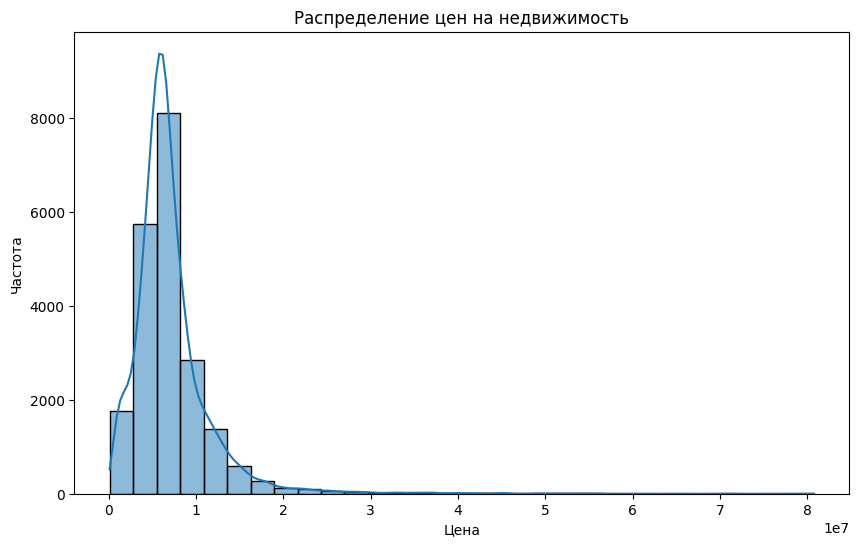

C:\Users\sergi\AppData\Local\Temp\ipykernel_25720\2434571725.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


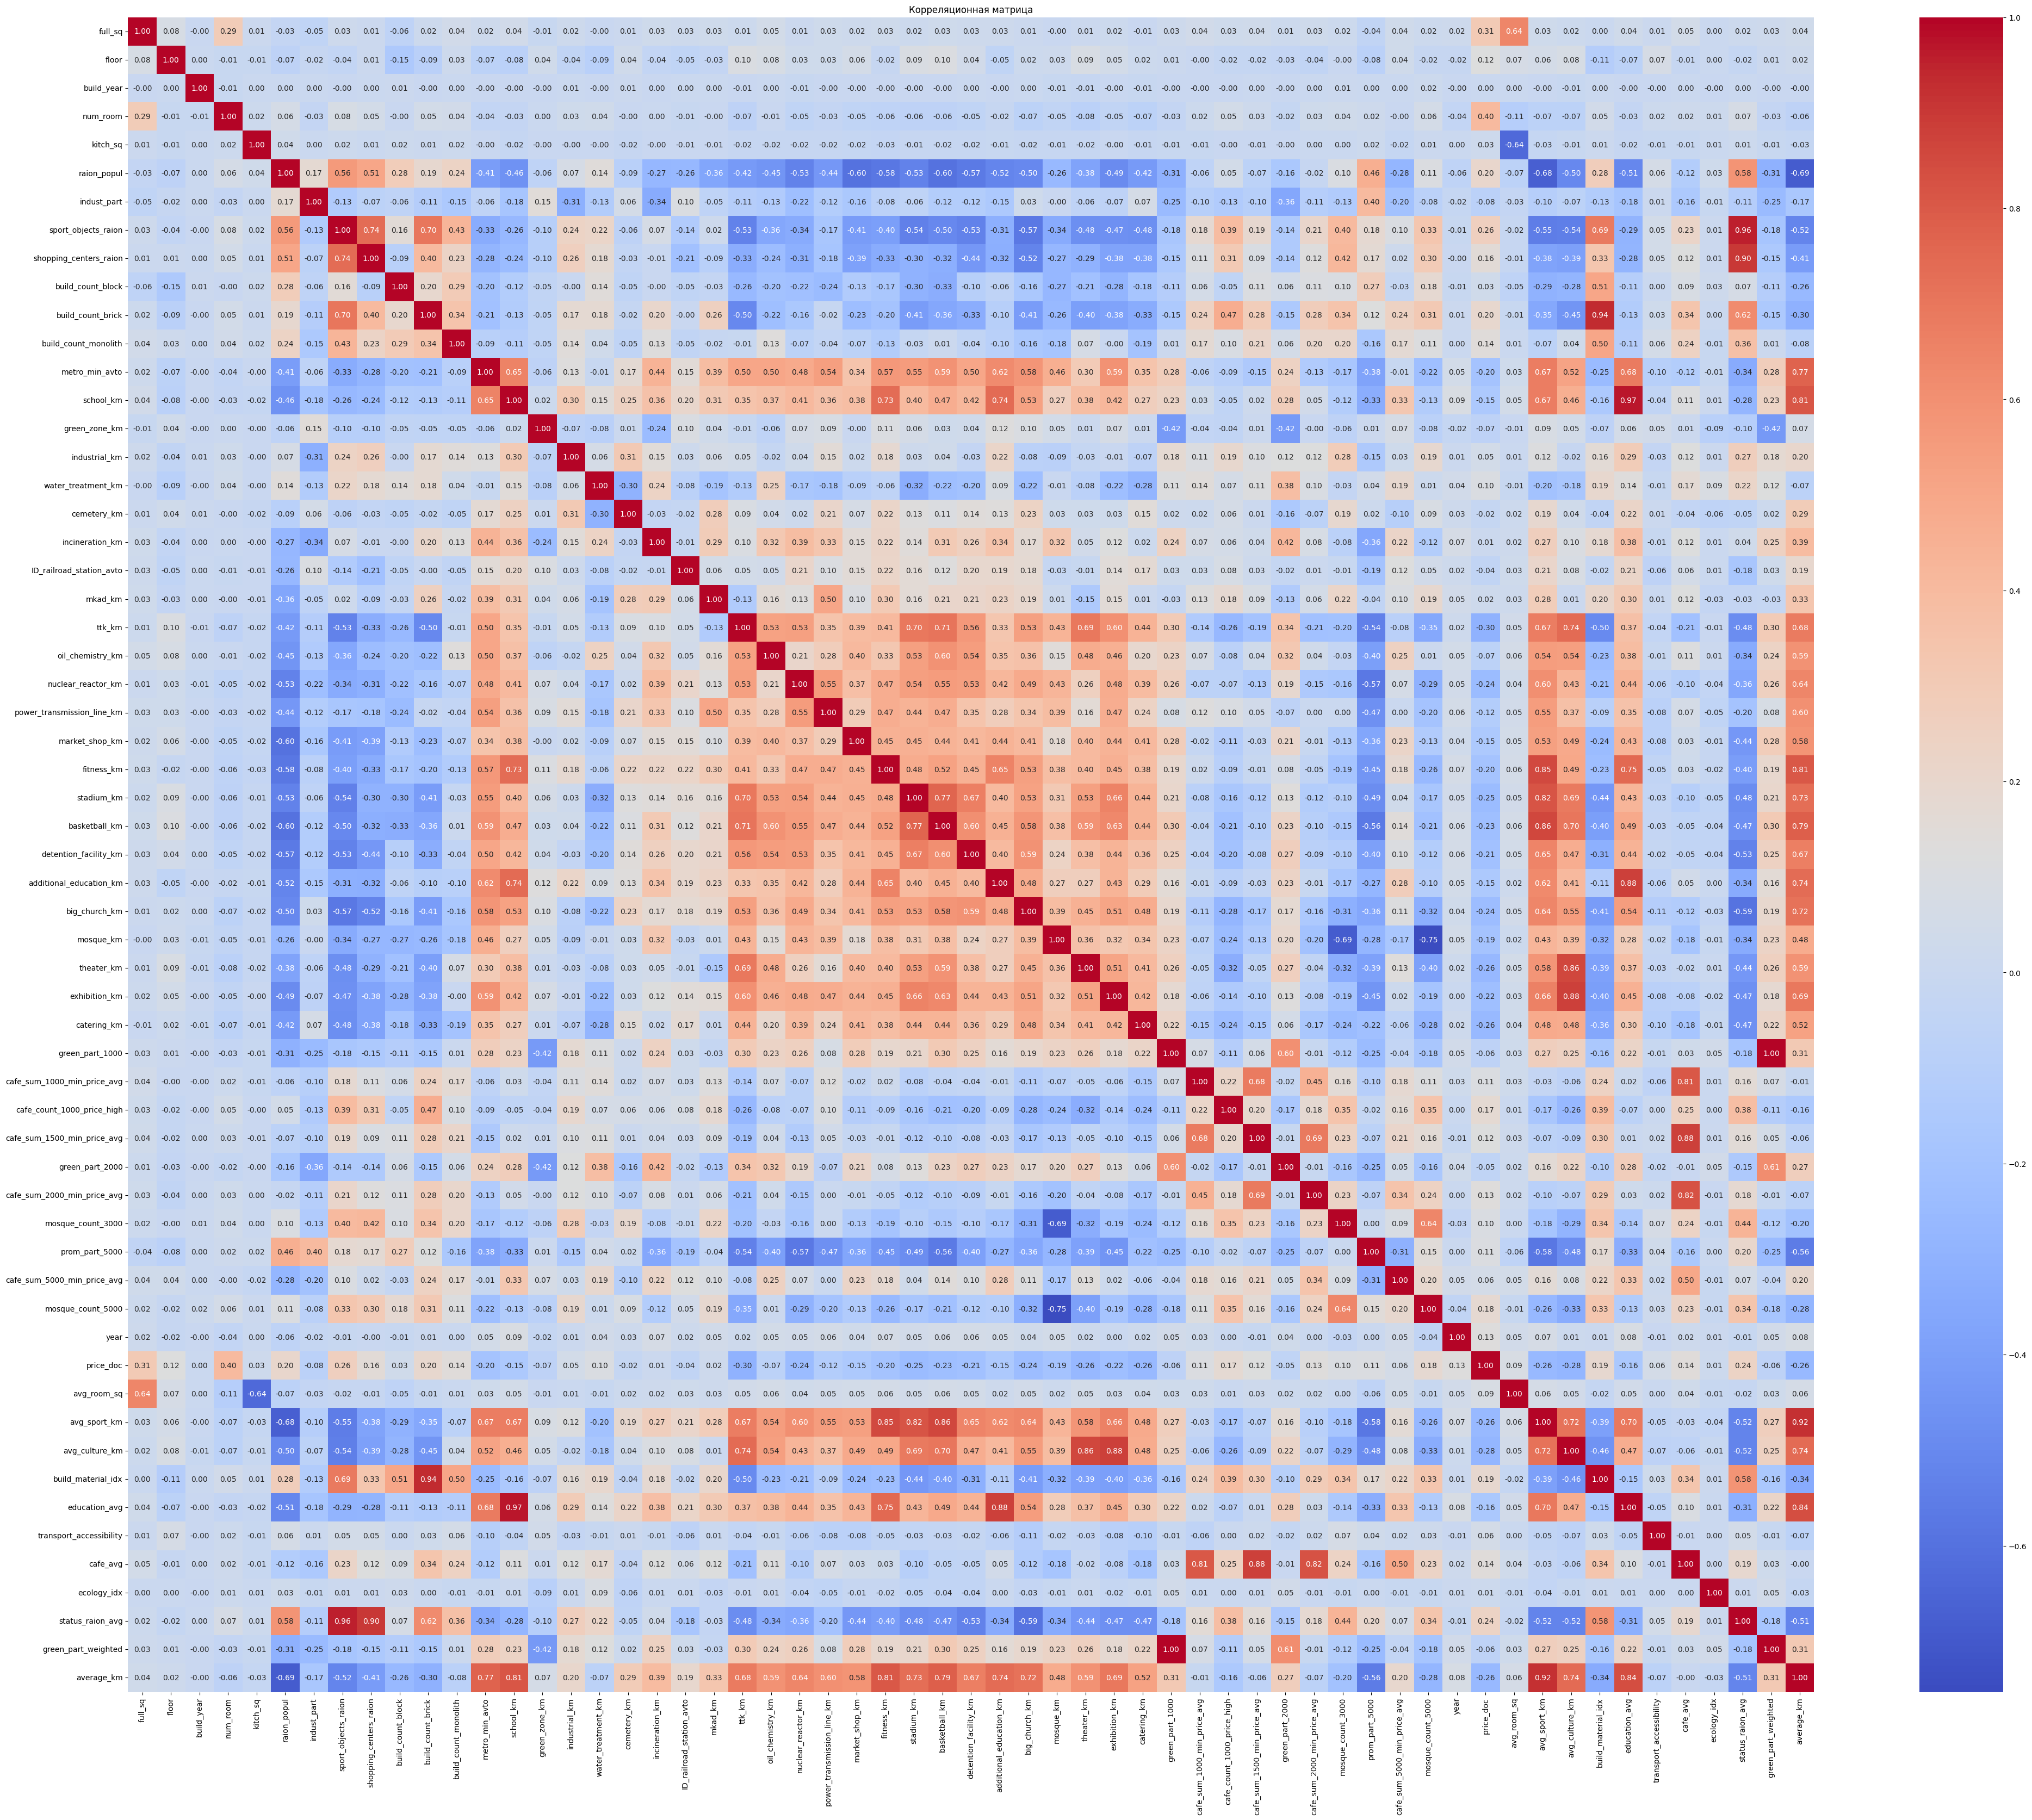

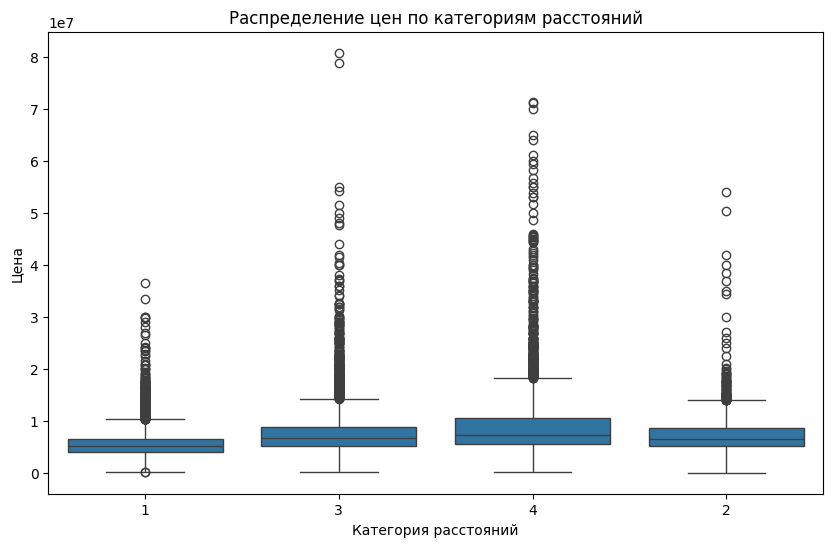

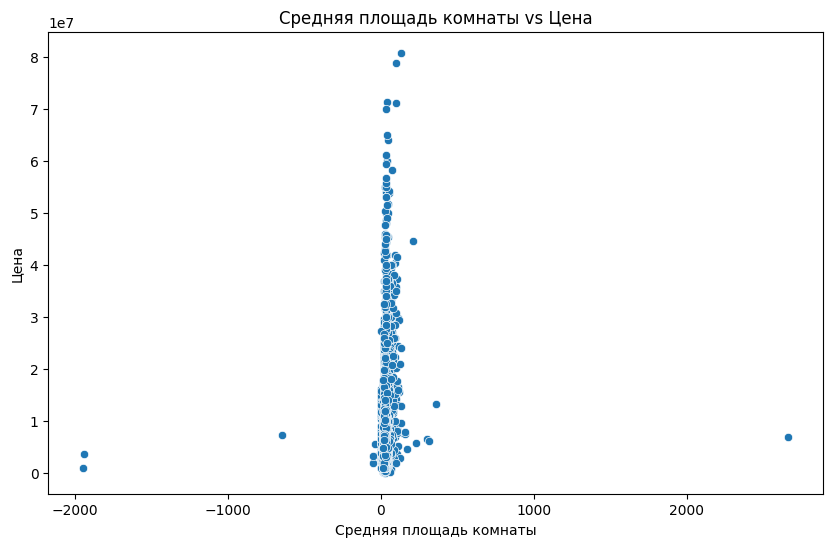

In [8]:
# Распределение целевой переменной (price_doc)
plt.figure(figsize=(10, 6))
sb.histplot(df['price_doc'], kde=True, bins=30)
plt.title('Распределение цен на недвижимость')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.show()

# Корреляционная матрица для числовых признаков
plt.figure(figsize=(50, 40))
corr_matrix = df.corr()
sb.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

# Распределение цен по категориям (km_category)
plt.figure(figsize=(10, 6))
sb.boxplot(x='km_category', y='price_doc', data=df)
plt.title('Распределение цен по категориям расстояний')
plt.xlabel('Категория расстояний')
plt.ylabel('Цена')
plt.show()

# Влияние средней площади комнаты на цену
plt.figure(figsize=(10, 6))
sb.scatterplot(x='avg_room_sq', y='price_doc', data=df)
plt.title('Средняя площадь комнаты vs Цена')
plt.xlabel('Средняя площадь комнаты')
plt.ylabel('Цена')
plt.show()

## Работа с ML

In [9]:
# Определение целевой переменной и признаков
target = 'price_doc'
X = df.drop(target, axis=1)
y = df[target]

# Подготовка фичей и таргетов
X = X.dropna()
y = y.loc[X.index]

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.0000000000001, random_state=52)

# Создание и обучение базовой модели Catboost

In [10]:
# Создание и обучение базовой модели Catboost
model = CatBoostRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Оценка модели
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Вывод результатов
print(f"Средняя абсолютная ошибка (MAE): {mae:.2f}")
print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")
print(f"Корень из среднеквадратичной ошибки (RMSE): {rmse:.2f}")
print(f"Коэффициент детерминации (R^2): {r2:.2f}")

Learning rate set to 0.066301
0:	learn: 4553252.5964779	total: 164ms	remaining: 2m 43s
1:	learn: 4408378.5098411	total: 169ms	remaining: 1m 24s
2:	learn: 4278097.8459406	total: 174ms	remaining: 57.8s
3:	learn: 4152808.1675614	total: 179ms	remaining: 44.5s
4:	learn: 4040128.8855723	total: 184ms	remaining: 36.6s
5:	learn: 3932817.3601313	total: 189ms	remaining: 31.3s
6:	learn: 3839792.1089528	total: 193ms	remaining: 27.4s
7:	learn: 3752924.6190503	total: 198ms	remaining: 24.5s
8:	learn: 3673637.3196257	total: 202ms	remaining: 22.3s
9:	learn: 3594806.2188596	total: 207ms	remaining: 20.5s
10:	learn: 3527847.6412929	total: 211ms	remaining: 19s
11:	learn: 3467604.0962562	total: 215ms	remaining: 17.7s
12:	learn: 3406103.1506596	total: 219ms	remaining: 16.7s
13:	learn: 3349001.0543211	total: 224ms	remaining: 15.8s
14:	learn: 3300384.1192712	total: 229ms	remaining: 15s
15:	learn: 3255617.6530807	total: 234ms	remaining: 14.4s
16:	learn: 3210720.7497667	total: 239ms	remaining: 13.8s
17:	learn: 31

C:\Users\sergi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


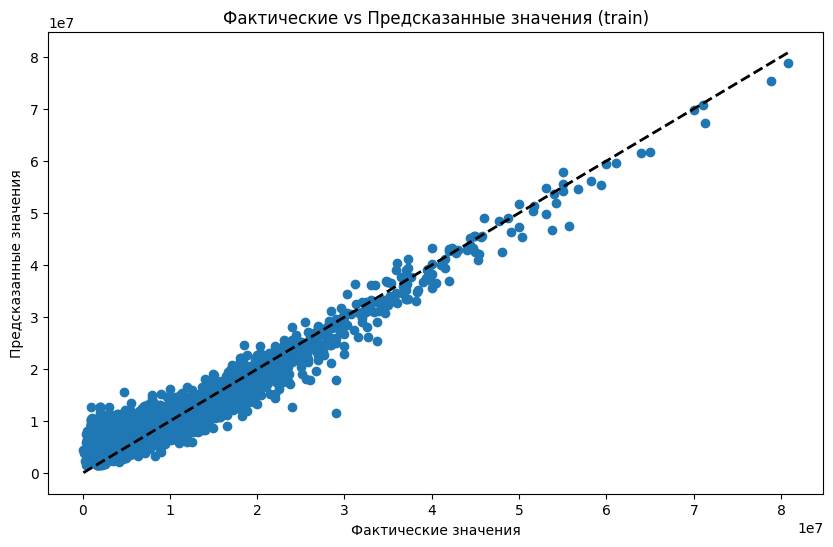

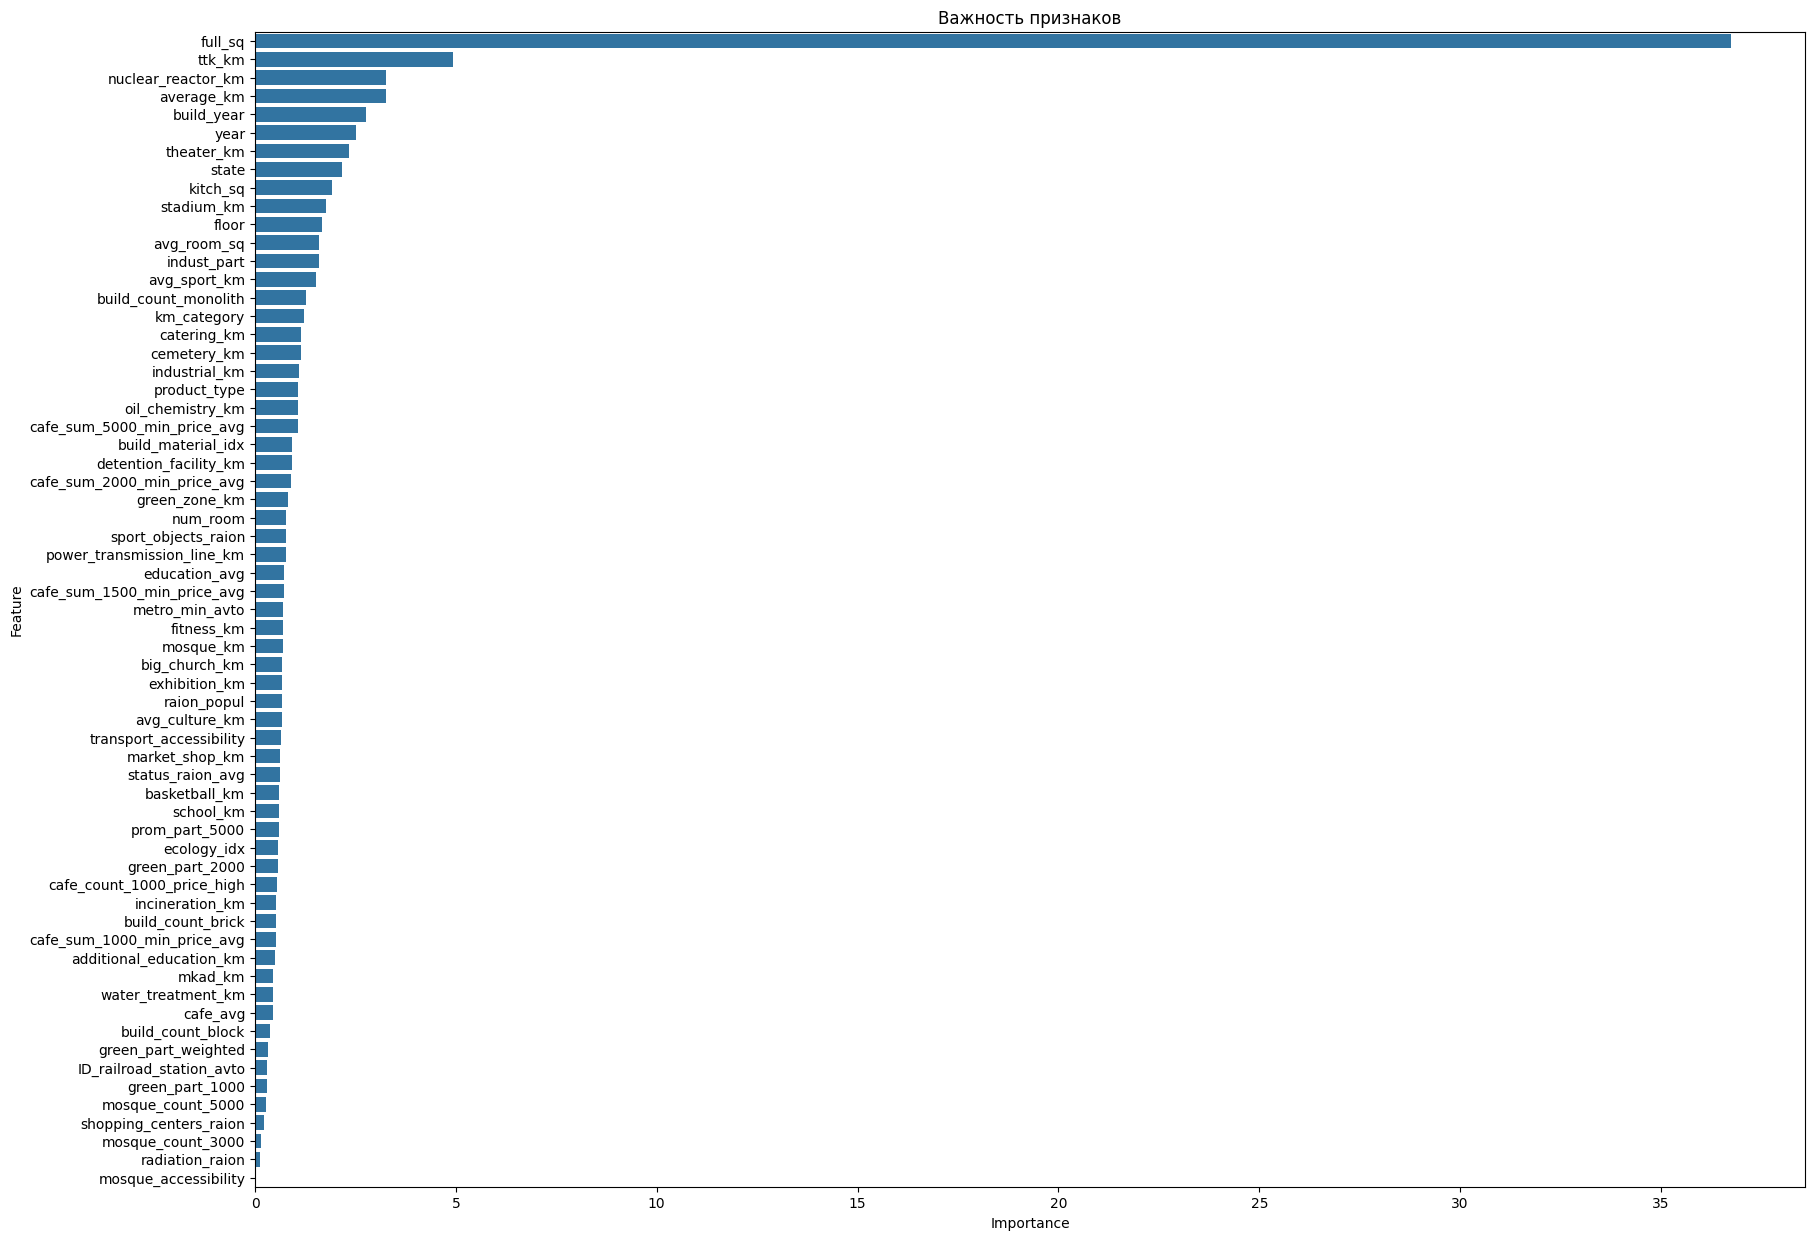

In [12]:
# Фактические vs Предсказанные значения (train)
plt.figure(figsize=(10, 6))
plt.scatter(y_train, model.predict(X_train))
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.title('Фактические vs Предсказанные значения (train)')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.show()

# Оценка важности признаков
feature_importances = model.get_feature_importance()
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(20, 15))
sb.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Важность признаков')
plt.show()

# Работа с параметами модели

In [13]:
# Определение параметров и модели
params = {
    'iterations': [500, 1000],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'loss_function': ['RMSE']
}

# Определение категориальных признаков
cat_features = [X_train.columns.get_loc(col) for col in categorical_columns if col in X_train.columns]

# Создание и обучение модели
model = CatBoostRegressor(cat_features=cat_features)

# Использование GridSearchCV для поиска лучших параметров
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Выбор и обучение лучшей модели
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
0:	learn: 4481167.6644595	total: 38.4ms	remaining: 19.2s
1:	learn: 4269864.0947309	total: 61.4ms	remaining: 15.3s
2:	learn: 4090404.5386263	total: 85.8ms	remaining: 14.2s
3:	learn: 3935831.7405329	total: 112ms	remaining: 13.9s
4:	learn: 3792034.1976839	total: 146ms	remaining: 14.5s
5:	learn: 3669607.2809916	total: 173ms	remaining: 14.3s
6:	learn: 3558465.6641659	total: 199ms	remaining: 14s
7:	learn: 3464223.9953214	total: 237ms	remaining: 14.6s
8:	learn: 3378530.9162836	total: 267ms	remaining: 14.5s
9:	learn: 3304455.8794665	total: 295ms	remaining: 14.5s
10:	learn: 3231264.2347791	total: 322ms	remaining: 14.3s
11:	learn: 3170808.4270182	total: 363ms	remaining: 14.7s
12:	learn: 3115147.6472205	total: 392ms	remaining: 14.7s
13:	learn: 3065945.9893804	total: 419ms	remaining: 14.5s
14:	learn: 3021413.4199943	total: 446ms	remaining: 14.4s
15:	learn: 2983762.5889739	total: 487ms	remaining: 14.7s
16:	learn: 2948628.6590928	total: 51

# Смотрим результаты на тестовой выбоке и считаем метрики

In [14]:
# Обучение и предсказания
y_pred = best_model.predict(X_test)

# Оценка модели
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Вывод результатов
print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Средняя абсолютная ошибка (MAE): {mae:.2f}")
print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")
print(f"Корень из среднеквадратичной ошибки (RMSE): {rmse:.2f}")
print(f"Коэффициент детерминации (R^2): {r2:.2f}")


Лучшие параметры: {'depth': 6, 'iterations': 500, 'learning_rate': 0.1, 'loss_function': 'RMSE'}
Средняя абсолютная ошибка (MAE): 851347.55
Среднеквадратичная ошибка (MSE): 724792644272.48
Корень из среднеквадратичной ошибки (RMSE): 851347.55
Коэффициент детерминации (R^2): nan


C:\Users\sergi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


# Загрузка и обработка тестовых данных

In [15]:
# Загрузка тестовых данных
test_df = pd.read_csv('test.csv', index_col=0)

# # Создание новых фичей для тестовых данных
test_df['avg_room_sq'] = (test_df['full_sq'] - test_df['kitch_sq']) / test_df['num_room']
test_df['avg_sport_km'] = test_df[['fitness_km', 'stadium_km', 'basketball_km']].mean(axis=1)
test_df['avg_culture_km'] = test_df[['theater_km', 'exhibition_km']].mean(axis=1)
test_df['build_material_idx'] = test_df[['build_count_block', 'build_count_brick', 'build_count_monolith']].mean(axis=1)
test_df['mosque_accessibility'] = (test_df[['mosque_count_3000', 'mosque_count_5000']].sum(axis=1) > 0).astype(int)
test_df['education_avg'] = test_df[['school_km', 'additional_education_km']].mean(axis=1)
test_df['transport_accessibility'] = (test_df['mkad_km'] + test_df['ttk_km']) / test_df['metro_min_avto']
test_df['cafe_avg'] = test_df[['cafe_sum_1000_min_price_avg', 'cafe_sum_1500_min_price_avg', 'cafe_sum_2000_min_price_avg', 'cafe_sum_5000_min_price_avg']].mean(axis=1)
test_df['ecology_idx'] = test_df['water_treatment_km'] / test_df['green_zone_km']
test_df['status_raion_avg'] = test_df[['sport_objects_raion', 'shopping_centers_raion', 'radiation_raion']].mean(axis=1)
test_df['green_part_weighted'] = test_df['green_part_2000'] * 0.2 + test_df['green_part_1000'] * 0.8
test_df['mosque_accessibility']

0       0
1       0
2       1
3       1
4       1
       ..
9137    1
9138    0
9139    0
9140    0
9141    0
Name: mosque_accessibility, Length: 9142, dtype: int32

# Создаем доп фичи как в нашей модели и делаем предобработку данных

In [16]:
# Среднее расстояние по всем меткам
test_df['average_km'] = test_df[km_columns].mean(axis=1)

# Категоризация расстояний
test_df['km_category'] = pd.cut(test_df['average_km'], bins=bins, labels=labels)
test_df['km_category'] = test_df['km_category'].map({'Очень близко': 4, 'Близко': 3, 'Средне': 2, 'Далеко': 1}).astype(str)

# Преобразование категориальных признаков в строки
for col in categorical_columns:
    if col in test_df.columns:
        test_df[col] = test_df[col].astype(str)

# Подготовка тестовых данных для предсказания
X_test_final = test_df.drop(columns=[target], errors='ignore')

# Убедитесь, что все категориальные признаки являются строками в тестовых данных
for col in cat_features:
    X_test_final.iloc[:, col] = X_test_final.iloc[:, col].astype(str)

In [17]:
# Создание Pool для тестовых данных
test_pool = Pool(data=X_test_final, cat_features=cat_features)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9142 entries, 0 to 9141
Data columns (total 63 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   full_sq                      9142 non-null   int64  
 1   floor                        9142 non-null   float64
 2   build_year                   9142 non-null   float64
 3   num_room                     9142 non-null   float64
 4   kitch_sq                     9142 non-null   float64
 5   state                        9142 non-null   object 
 6   product_type                 9142 non-null   object 
 7   raion_popul                  9142 non-null   float64
 8   indust_part                  9142 non-null   float64
 9   sport_objects_raion          9142 non-null   int64  
 10  shopping_centers_raion       9142 non-null   int64  
 11  radiation_raion              9142 non-null   object 
 12  build_count_block            9142 non-null   float64
 13  build_count_brick 

# Предсказания на тестовом наборе данных и выгрузка их в csv

In [18]:
# Предсказания на тестовом наборе данных
test_predictions = best_model.predict(test_pool)

# Создание файла submission.csv
submission = pd.DataFrame({'price_doc': test_predictions})
submission.index.name = ''

# Сохранение в CSV
submission.to_csv('submission.csv', index=True)